# Project Title : E-commerce Return Rate Reduction Analysis (No-5)
Objective : Identifing why customers return products and how return rates vary by category, geography,
            and marketing channel.

In [4]:
# importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [8]:
df.head(5)

Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [12]:
df.describe()

Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792        1.258479
min     103.000000    10.000000   1284.000000     0.000000        0.000000
25%     142.000000    22.597500   3349.372500     0.060000        1.000000
50%     150.000000    34.720000   5173.140000     0.120000        1.000000
75%     158.000000    46.712500   7009.960000     0.190000        2.000000
max     194.000000    59.970000  10761.850000     0.250000        8.000000

In [14]:
# Checking for missing values
df.isnull().sum() 

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [16]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [20]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [22]:
# Calculating Return Rate also making sure to avoid dividing by zero
df['Return Rate'] = df.apply(lambda row: row['Units Returned'] / row['Units Sold'] if row['Units Sold'] > 0 else 0, axis=1)

In [24]:
# Quick look at return rate distribution
df['Return Rate'].describe()

count    4384.000000
mean        0.010186
std         0.008337
min         0.000000
25%         0.006024
50%         0.007299
75%         0.014286
max         0.053333
Name: Return Rate, dtype: float64

In [26]:
df.to_csv('Supplement_Sales_Weekly_Expanded_cleaned.csv' , index = False)

# Exploratory Data Analysis

In [29]:
# Average return rate per category
category_returns = df.groupby('Category')['Return Rate'].mean().sort_values(ascending=False)
print(category_returns)

Category
Hydration      0.010746
Vitamin        0.010475
Amino Acid     0.010355
Fat Burner     0.010229
Performance    0.010207
Protein        0.010203
Mineral        0.010079
Omega          0.009870
Sleep Aid      0.009860
Herbal         0.009433
Name: Return Rate, dtype: float64


In [31]:
platform_return_summary = df.groupby('Platform').agg({ # Platform or Suppliers
    'Units Sold': 'sum',
    'Units Returned': 'sum'
})

platform_return_summary['Return %'] = (platform_return_summary['Units Returned'] / platform_return_summary['Units Sold']) * 100
platform_return_summary = platform_return_summary.sort_values(by='Return %', ascending=False)

print(platform_return_summary)


          Units Sold  Units Returned  Return %
Platform                                      
Amazon        220623            2295  1.040236
iHerb         225427            2291  1.016294
Walmart       212428            2128  1.001751


In [33]:
# Return rate per location
location_returns = df.groupby('Location')['Return Rate'].mean().sort_values(ascending=False)
print(location_returns)

Location
UK        0.010510
USA       0.010070
Canada    0.009977
Name: Return Rate, dtype: float64


In [35]:
category_return_summary = df.groupby('Category').agg({
    'Units Sold': 'sum',
    'Units Returned': 'sum'
})

category_return_summary['Return %'] = (category_return_summary['Units Returned'] / category_return_summary['Units Sold']) * 100
category_return_summary = category_return_summary.sort_values(by='Return %', ascending=False)

print(category_return_summary)

             Units Sold  Units Returned  Return %
Category                                         
Hydration         41065             441  1.073907
Vitamin          123434            1293  1.047523
Amino Acid        41027             428  1.043215
Fat Burner        40743             417  1.023489
Performance       82523             841  1.019110
Protein           82120             836  1.018022
Mineral          123668            1251  1.011579
Sleep Aid         41165             408  0.991133
Omega             41325             407  0.984876
Herbal            41408             392  0.946677


# Data Visualiztion for better understanding

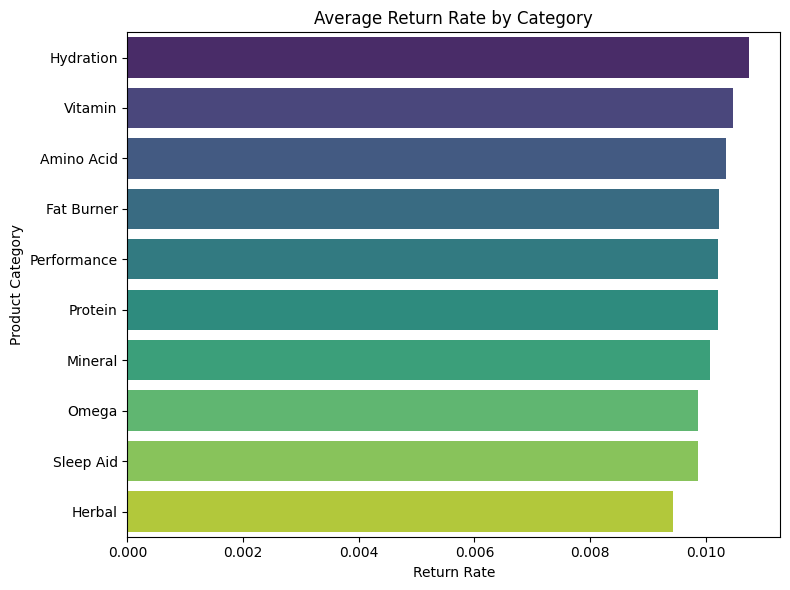

In [38]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,6))
sns.barplot(x=category_returns.values, y=category_returns.index, palette="viridis")
plt.title("Average Return Rate by Category")
plt.xlabel("Return Rate")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

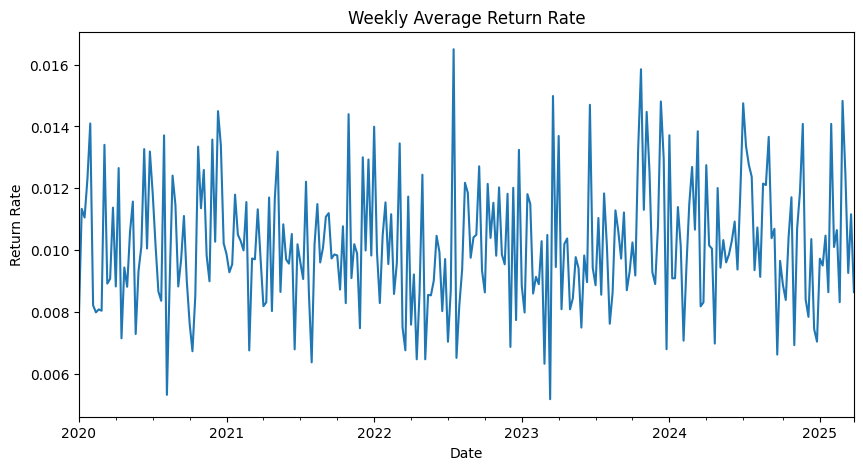

In [40]:
# Group by Date for trend analysis
weekly_return = df.groupby('Date')['Return Rate'].mean() # weekly trend analysis

weekly_return.plot(figsize=(10,5), title='Weekly Average Return Rate')
plt.xlabel("Date")
plt.ylabel("Return Rate")
plt.show()

In [42]:
# 1. Calculate 90th percentile threshold
threshold = df['Return Rate'].quantile(0.90)
high_risk_products = df[df['Return Rate'] >= 0.021127]


# 2. Filter high-risk products using >=
#high_risk_products = df[df['Return Rate'] >= threshold]

# 3. Show top results
high_risk_products_sorted = high_risk_products.sort_values(by='Return Rate', ascending=False)
high_risk_products_sorted[['Date', 'Product Name', 'Category', 'Return Rate', 'Platform', 'Location']].head(10)

Date       Product Name     Category  Return Rate Platform Location
3222 2023-11-13           Creatine  Performance     0.053333  Walmart   Canada
359  2020-06-08               Zinc      Mineral     0.051471  Walmart      USA
3769 2024-07-08          Magnesium      Mineral     0.050000    iHerb       UK
2488 2022-12-26  Collagen Peptides      Protein     0.047297    iHerb   Canada
827  2020-12-28          Melatonin    Sleep Aid     0.044872  Walmart       UK
2483 2022-12-26       Multivitamin      Vitamin     0.043478  Walmart      USA
3929 2024-09-16          Magnesium      Mineral     0.043478  Walmart      USA
315  2020-05-18          Melatonin    Sleep Aid     0.041667   Amazon      USA
2892 2023-06-19             Biotin      Vitamin     0.041379   Amazon      USA
3338 2024-01-01        Ashwagandha       Herbal     0.040698  Walmart   Canada

In [44]:
print(f"90th percentile Return Rate threshold: {threshold:.6f}")

90th percentile Return Rate threshold: 0.021127


In [46]:
df.to_csv('high_risk_products_sorted.csv', index=False)

# Model 

In [49]:
threshold = df['Return Rate'].quantile(0.90)

# Creating binary target: 1 = High Risk, 0 = Normal
df['High Return'] = (df['Return Rate'] >= threshold).astype(int)

# Checking distribution
print(df['High Return'].value_counts())

High Return
0    3937
1     447
Name: count, dtype: int64


In [51]:
# Features that could affects the return rate and target
features = ['Discount', 'Price', 'Units Sold']
X = df[features]
y = df['High Return']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
#model = LogisticRegression()
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)


In [54]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.51      0.65       782
           1       0.13      0.61      0.22        95

    accuracy                           0.52       877
   macro avg       0.52      0.56      0.44       877
weighted avg       0.83      0.52      0.61       877

Confusion Matrix:
 [[398 384]
 [ 37  58]]


In [57]:
# Show importance of each feature
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(importance)


      Feature  Coefficient
1       Price    -0.001684
2  Units Sold    -0.011332
0    Discount    -0.676058


In [59]:
coef_df = pd.DataFrame({
    'Feature': ['Discount', 'Units Sold', 'Price'],
    'Coefficient': [-0.676058, -0.011332, -0.001684]  
})
coef_df.to_csv("Return_Predictor_Feature_Impact.csv", index=False)